### Example - Delhi climate measurements, time series

In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load the data
df = pd.read_csv("DailyDelhiClimateTrain.csv")

# take just the first 500 for a smaller dataset, for easier visualization purposes
df = df.iloc[0:500]
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
495,2014-05-11,29.625000,40.375000,7.650000,1004.000000
496,2014-05-12,28.000000,53.375000,10.887500,1004.875000
497,2014-05-13,25.250000,65.750000,9.962500,1008.375000
498,2014-05-14,26.875000,55.250000,8.575000,1006.500000


**The "easy" or "straight-forward" way to analyze this data is to just use separate line plots for each variable...**

<Axes: xlabel='date', ylabel='meantemp'>

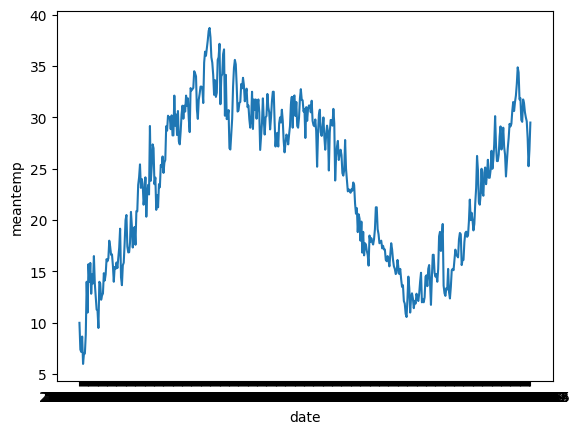

In [49]:
# line plot for meantemp
sns.lineplot(x="date", y="meantemp", data=df)

<Axes: xlabel='date', ylabel='humidity'>

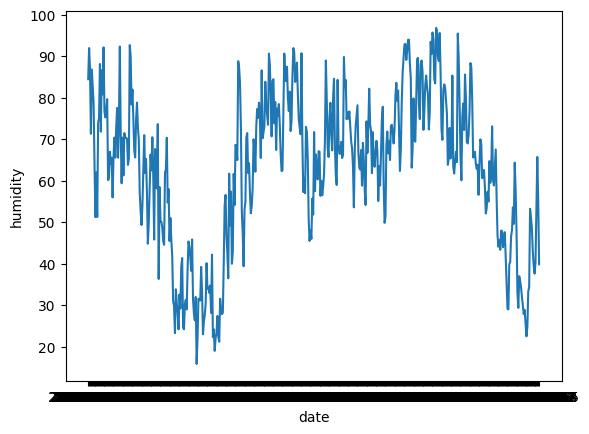

In [ ]:
# line plot for humidity
sns.lineplot(x="date", y="humidity", data=df)

**...however, it's quite difficult to compare similar variables to each other this way.**

In order to get all variables into same plot, we have to group and melt our data first.

In [51]:
# date -column into actual date time format
df['date'] = pd.to_datetime(df['date'])

# group data by average value each month (to reduce amount of data)
df_grouped = df.groupby(pd.Grouper(key="date", freq="ME")).mean().reset_index()
df_grouped = df.drop("meanpressure", axis=1)

In [ ]:
# now we should have grouped data by average values
df_grouped

,date,meantemp,humidity,wind_speed
0,2013-01-01,10.000000,84.500000,0.000000
1,2013-01-02,7.400000,92.000000,2.980000
2,2013-01-03,7.166667,87.000000,4.633333
3,2013-01-04,8.666667,71.333333,1.233333
4,2013-01-05,6.000000,86.833333,3.700000
...,...,...,...,...
495,2014-05-11,29.625000,40.375000,7.650000
496,2014-05-12,28.000000,53.375000,10.887500
497,2014-05-13,25.250000,65.750000,9.962500
498,2014-05-14,26.875000,55.250000,8.575000


In [ ]:
# use pandas melt() in order to CONVERT COLUMNS into one row called => Measurement
# the actual value will be in the "Value" -column
# also known as the "melt-format" or "long-format"
# this is only needed for visualizations, this format is not practical for other use cases 
# (except a few certain machine learning algorithms, like time series classification/forecasting)
# => good idea to save the melt() -version into a separate variable! (to retain the original too)
df_melt = pd.melt(df_grouped, id_vars=['date'], value_vars=["meantemp", "humidity", "wind_speed"],
                  var_name="Measurement", value_name="Value")

In [54]:
df_melt

,date,Measurement,Value
0,2013-01-01,meantemp,10.000000
1,2013-01-02,meantemp,7.400000
2,2013-01-03,meantemp,7.166667
3,2013-01-04,meantemp,8.666667
4,2013-01-05,meantemp,6.000000
...,...,...,...
1495,2014-05-11,wind_speed,7.650000
1496,2014-05-12,wind_speed,10.887500
1497,2014-05-13,wind_speed,9.962500
1498,2014-05-14,wind_speed,8.575000


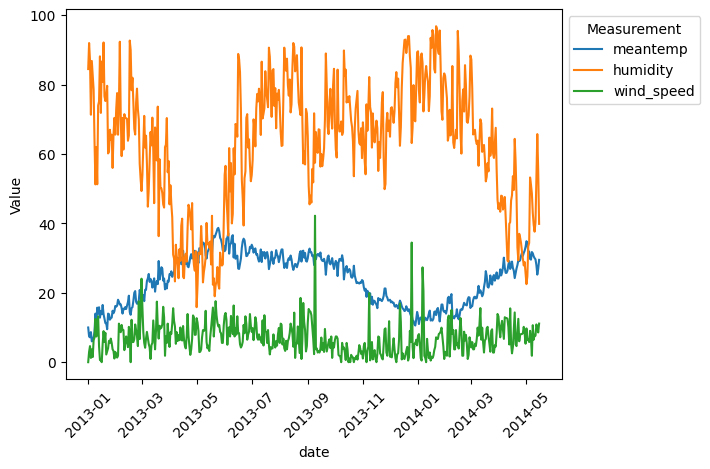

In [55]:
# plot all variables now into same plot THANKS TO MELT-FORMAT (long format)
# YOU CAN ALSO MOVE THE LEGEND BY USING MATPLOTLIB
plt.xticks(rotation=45)
plot = sns.lineplot(data=df_melt, x="date", y="Value", hue="Measurement")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))